In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X  = np.linspace(0,1,500)
Y  = np.linspace(-1,0,500)

In [9]:
X,Y = np.meshgrid(X,Y)

In [75]:
J=5
Z = 2*X**2-1 + 2*X*Y + J*(2*Y**2-1+2*Y*(4*X**3-3*X))

<IPython.core.display.Javascript object>


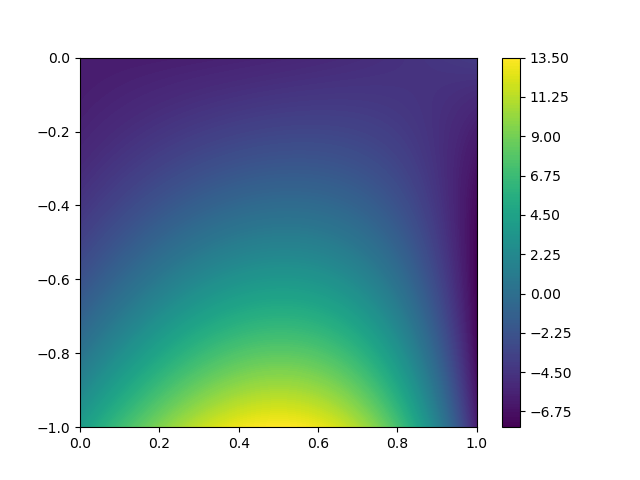

In [76]:

plt.contourf(X,Y,Z,150)
plt.colorbar()

In [59]:
diff_x = 4* X +2*Y +6*J*Y*(4**X**2-1)

<IPython.core.display.Javascript object>


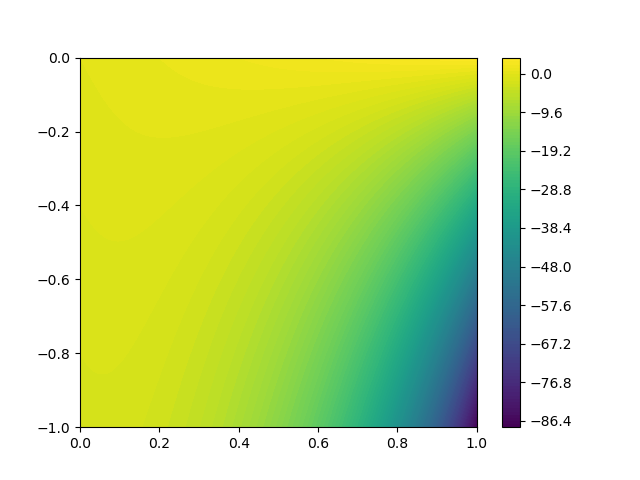

In [61]:
plt.contourf(X,Y,diff_x,150)
plt.colorbar()

In [41]:
%matplotlib notebook

<IPython.core.display.Javascript object>


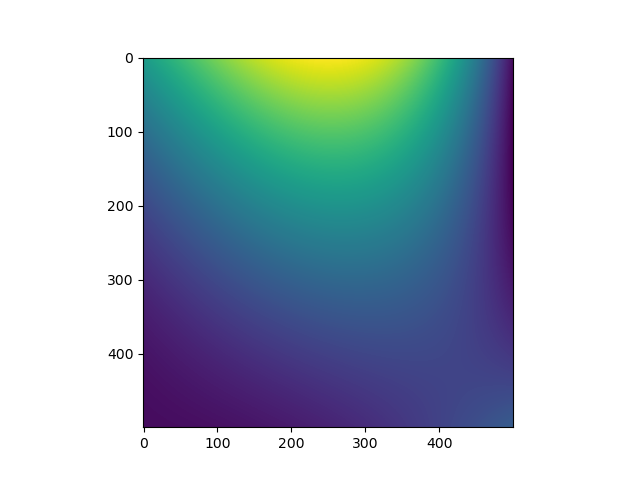

In [54]:
plt.imshow(Z)

In [77]:
from sympy import *

In [212]:
eta, zeta = symbols('eta, zeta')

In [213]:
J = symbols('J', positive=True)

In [235]:
res_eta = (-16*(-3*J**2+J)+sqrt((16*(-3*J**2+J))**2-4*16*3* J**2*(1-10*J+9*J**2)))/(2*16*3* J**2)
res_eta = sqrt(res_eta)

In [236]:
res_eta_2 = (-16*(-3*J**2+J)-sqrt((16*(-3*J**2+J))**2-4*16*3* J**2*(1-10*J+9*J**2)))/(2*16*3* J**2)
res_eta_2 = sqrt(res_eta_2)

In [229]:
E = 2*eta**2-1 + 2*eta*zeta + J*(2*zeta**2-1+2*zeta*(4*eta**3-3*eta))

In [230]:
res_zeta = -2*eta/(1+3*J*(4*eta**2-1))

In [231]:
E_min = E.subs(zeta, res_zeta).subs(eta, res_eta_2)

In [232]:
simplify(E_min)

(-54*J**4 + 18*J**3*sqrt(9*J**2 + 6*J + 1) + 27*J**3 - 15*J**2*sqrt(9*J**2 + 6*J + 1) - 27*J**2 + 8*J*sqrt(9*J**2 + 6*J + 1) + J - 3*sqrt(9*J**2 + 6*J + 1) - 3)/(6*J*(9*J**2 - 3*J*sqrt(9*J**2 + 6*J + 1) + sqrt(9*J**2 + 6*J + 1) + 1))

In [220]:
simplify(diff(E, zeta).subs(zeta, res_zeta).subs(eta, res_eta))

0

## Check cases of $\zeta=-1$

In [242]:
E_minus = simplify(E.subs(zeta,-1))

In [243]:
simplify(E_minus.subs(eta,1))

-J - 1

In [246]:
factor(simplify(diff(E_minus,eta)))

-2*(2*eta - 1)*(6*J*eta + 3*J - 1)

In [250]:
eta_res_minus_1 = Rational(1,2)
eta_res_minus_2 = (1-3*J)/6/J

In [261]:
(simplify(E_minus.subs(eta, eta_res_minus_2)))

-J + 1/2 - 1/(3*J) + 1/(54*J**2)

In [260]:
simplify(diff(E_minus, eta).subs(eta, eta_res_minus_2))

0

## Check cases of $\eta=1$

In [262]:
E_plus = simplify(E.subs(eta,1))

In [266]:
factor(diff(E_plus,zeta))

2*(2*J*zeta + J + 1)

In [267]:
zeta_res_plus = -(J+1)/2/J

In [268]:
(simplify(E_plus.subs(zeta, zeta_res_plus)))

-(3*J**2 + 1)/(2*J)

# Find solution inside sqr

In [275]:
simplify(factor(diff(E, zeta)).subs(zeta,zeta_1))

0

In [282]:
factor(diff(E, eta))

2*(12*J*eta**2*zeta - 3*J*zeta + 2*eta + zeta)

In [286]:
zeta_2 = solve(factor(diff(E, eta)), zeta)[0]

In [287]:
zeta_2

-2*eta/(12*J*eta**2 - 3*J + 1)

In [273]:
zeta_1 = -eta*(4*J*eta**2-3*J+1)/2/J

In [288]:
zeta_1

-eta*(4*J*eta**2 - 3*J + 1)/(2*J)

In [291]:
res = solve(zeta_1-zeta_2, eta)

In [292]:
eta_1 = res[2]
eta_2 = res[4]

In [293]:
eta_1

sqrt(J - 1)/(2*sqrt(J))

In [295]:
zeta_1.subs(eta, eta_1)

sqrt(J - 1)/(2*sqrt(J))

In [298]:
simplify(E.subs(zeta,zeta_1).subs(eta, eta_1))

-(3*J**2 + 1)/(2*J)

In [294]:
eta_2

sqrt(3)*sqrt(9*J - 1)/(6*sqrt(J))

<IPython.core.display.Javascript object>


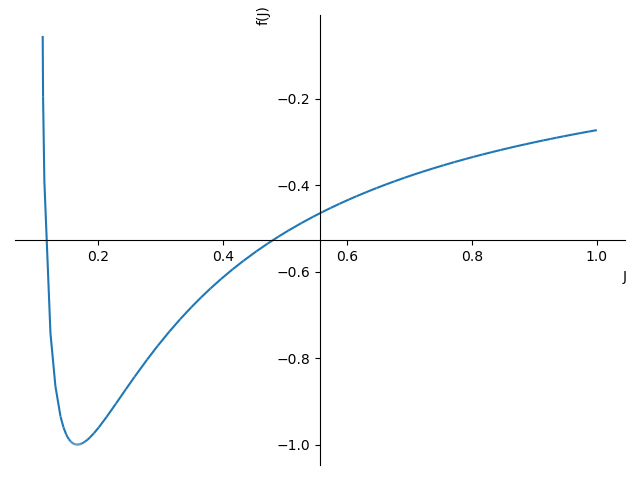

In [301]:
plot(zeta_1.subs(eta,eta_2), (J,0,1))

In [302]:
simplify(E.subs(zeta,zeta_1).subs(eta, eta_2))

-J + 1/2 - 1/(3*J) + 1/(54*J**2)

In [ ]:
simplify(E_plus.subs(zeta,1))

In [191]:
p0 = plot(E_min,(J,0,10), color='red',show=False)

<IPython.core.display.Javascript object>


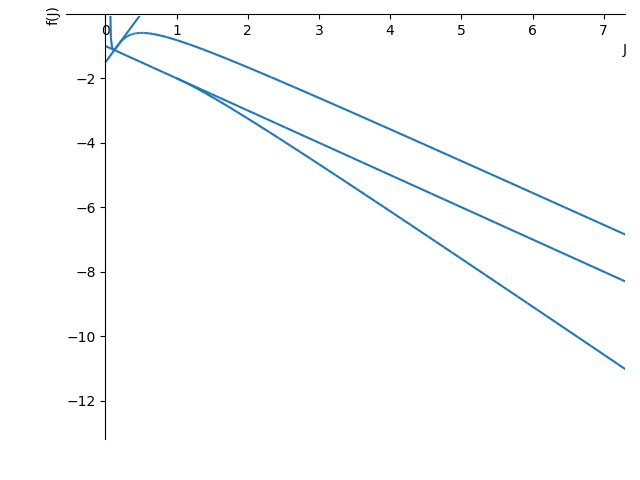

In [192]:
p1 = plot(E.subs(eta,Rational(1,2)).subs(zeta,-1), (J,0,10), show=False, label='1')
p2 = plot(E.subs(eta, 1).subs(zeta,-1), (J,0,10), show=False, label='2')
p3 = plot(E.subs(eta, 1).subs(zeta,-(J+1)/2/J), (J,1,10), show=False, label='2')
p1.append(p2[0])
p1.append(p3[0])
p1.append(p0[0])
p1.show()

In [110]:
E

J*(2*zeta**2 + 2*zeta*(4*eta**3 - 3*eta) - 1) + 2*eta**2 + 2*eta*zeta - 1

In [312]:
import matplotlib as mpl

In [319]:
mpl.use("pgf")
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams.update({
    "pgf.texsystem":   "pdflatex", # or any other engine you want to use
    "text.usetex":     True,       # use TeX for all texts
    "font.family":     "serif",
    "font.serif":      [],         # empty entries should cause the usage of the document fonts
    "font.sans-serif": [],
    "font.monospace":  [],
    "font.size":       10,         # control font sizes of different elements
    "axes.labelsize":  10,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "pgf.preamble": [              # specify additional preamble calls for LaTeX's run
        r"\usepackage[T1]{fontenc}",
        r"\usepackage{siunitx}",
        r"\usepackage[utf8]{inputenc}",
        r"\DeclareUnicodeCharacter{2212}{-}",
    ],
})

/home/maxkway/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


<IPython.core.display.Javascript object>


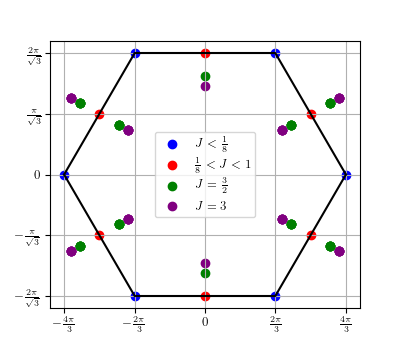

In [322]:
%matplotlib notebook
plt.figure(figsize=(4,2*np.sqrt(3)))
plt.hlines(2*np.pi/np.sqrt(3), -2*np.pi/3, 2*np.pi/3, color='black' )
plt.hlines(-2*np.pi/np.sqrt(3), -2*np.pi/3, 2*np.pi/3, color='black' )

x1=np.array([2*np.pi/3, 4*np.pi/3])
y1 = np.array([2*np.pi/np.sqrt(3),0])
plt.plot(x1,y1, color='black')
plt.plot(-x1,y1, color='black')
plt.plot(x1,-y1, color='black')
plt.plot(-x1,-y1, color='black')

for n_x in [-1,0,1]:
    for n_y in [-2,-1,0,1,2]:
        plt.scatter(4*np.pi*n_x, 2/np.sqrt(3)*(np.pi+2*pi*n_y), color='red')
        plt.scatter(2*(np.pi+2*pi*n_x), 4*np.pi*n_y/np.sqrt(3), color='red')
        plt.scatter(np.pi+2*np.pi*n_x, 1/np.sqrt(3)*(np.pi+2*np.pi*n_y), color='red')
        
        
        plt.scatter(-2*np.pi/3+4*np.pi*n_x, 2/np.sqrt(3)*(np.pi+2*np.pi*n_y), color='blue')
        plt.scatter(2*np.pi/3+4*np.pi*n_x, 2/np.sqrt(3)*(np.pi+2*np.pi*n_y), color='blue')
        
        plt.scatter(+4*np.pi/3+4*np.pi*n_x, 4*np.pi*n_y/np.sqrt(3), color='blue')
        plt.scatter(-4*np.pi/3+4*np.pi*n_x, 4*np.pi*n_y/np.sqrt(3), color='blue')
        #
        J=1.5
        plt.scatter(4*np.pi*n_x, 2/np.sqrt(3)*(np.arccos(-(J+1)/2/J)+2*np.pi*n_y), color='green')
        plt.scatter(4*np.pi*n_x, 2/np.sqrt(3)*(-np.arccos(-(J+1)/2/J)+2*np.pi*n_y), color='green')
        
        plt.scatter(2*(np.pi+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos((J+1)/2/J)+2*np.pi*n_y), color='green')
        plt.scatter(2*(np.pi+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos((J+1)/2/J)+2*np.pi*n_y), color='green')
        
        
        plt.scatter(2*(np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='green')
        plt.scatter(2*(-np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='green')   
        plt.scatter(2*(np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='green') 
        plt.scatter(2*(-np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='green')        

        
        plt.scatter(2*(np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='green')
        plt.scatter(2*(-np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='green')   
        plt.scatter(2*(np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='green') 
        plt.scatter(2*(-np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='green')        

        
        J=3
        plt.scatter(4*np.pi*n_x, 2/np.sqrt(3)*(np.arccos(-(J+1)/2/J)+2*np.pi*n_y), color='purple')
        plt.scatter(4*np.pi*n_x, 2/np.sqrt(3)*(-np.arccos(-(J+1)/2/J)+2*np.pi*n_y), color='purple')
        
        plt.scatter(2*(np.pi+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos((J+1)/2/J)+2*np.pi*n_y), color='purple')
        plt.scatter(2*(np.pi+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos((J+1)/2/J)+2*np.pi*n_y), color='purple')
        
        
        plt.scatter(2*(np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='purple')
        plt.scatter(2*(-np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='purple')   
        plt.scatter(2*(np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='purple') 
        plt.scatter(2*(-np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos(1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='purple')        

        
        plt.scatter(2*(np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='purple')
        plt.scatter(2*(-np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='purple')   
        plt.scatter(2*(np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='purple') 
        plt.scatter(2*(-np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), 2/np.sqrt(3)*(-np.arccos(-1/2*np.sqrt(1-1/J))+2*np.pi*n_x), color='purple')        

plt.scatter([],[],c='blue', label=r'$J<\frac{1}{8}$')
plt.scatter([],[],c='red', label=r'$\frac{1}{8}<J<1$')        
plt.scatter([],[],c='green', label=r'$J=\frac{3}{2}$')        
plt.scatter([],[],c='purple', label=r'$J=3$')        

plt.legend()

plt.xticks([-4*np.pi/3,-2*np.pi/3 , 0 , 2*np.pi/3, 4*np.pi/3], [r'$-\frac{4\pi}{3}$',r'$-\frac{2\pi}{3}$',r'$0$',r'$\frac{2\pi}{3}$', r'$\frac{4\pi}{3}$'])
plt.yticks([-2*np.pi/np.sqrt(3),-np.pi/np.sqrt(3) , 0 , np.pi/np.sqrt(3), 2*np.pi/np.sqrt(3)], [r'$-\frac{2\pi}{\sqrt{3}}$',r'$-\frac{\pi}{\sqrt{3}}$',r'$0$',r'$\frac{\pi}{\sqrt{3}}$', r'$\frac{2\pi}{\sqrt{3}}$'])
 
plt.xlim(-4*np.pi/3*(1+0.1), 4*np.pi/3*(1+0.1))
 
plt.ylim(-2*np.pi/np.sqrt(3)*(1+0.1), 2*np.pi/np.sqrt(3)*(1+0.1))
#plt.axis('scaled') 
plt.grid()
plt.savefig('diagram.pgf')

In [151]:
E.subs(eta,1)

J*(2*zeta**2 + 2*zeta - 1) + 2*zeta + 1

In [155]:
factor(diff(E.subs(eta,1), zeta))

2*(2*J*zeta + J + 1)

In [154]:
factor(diff(E.subs(zeta,-1), eta))

-2*(2*eta - 1)*(6*J*eta + 3*J - 1)

In [160]:
simplify(E.subs(eta,1).subs(zeta, - (J+1)/2/J)).subs(J,1)

-2

In [162]:
simplify(E.subs(eta,Rational(1,2)).subs(zeta, - 1)).subs(J,1)

3/2